## a)

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Q1 Sobel

In [2]:
# generate random matrix with size n*n
def generateRandomMatrix(n):
  matrix = np.random.randint(0, 256, size=(n, n))
  return matrix

In [3]:
matrix = generateRandomMatrix(10)

In [4]:
# write convolution function
def convolve(matrix: np.ndarray, kernel):
  g = np.zeros((matrix.shape[0], matrix.shape[1]), dtype=np.int32)
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      summation = 0
      for m in range(-(kernel.shape[0]//2), kernel.shape[0]//2+1):
        for n in range(-(kernel.shape[1]//2), kernel.shape[1]//2+1):
          xm, ym = i+m, j+n
          xk, yk = kernel.shape[0]//2+m, kernel.shape[1]//2+n
          nm, nk = 0, 0
          if xm >= 0 and xm < matrix.shape[0] and ym >= 0 and ym < matrix.shape[1]:
            nm = matrix[xm,ym]
          nk = kernel[xk,yk]
          summation += nm * nk
      g[i, j] = summation
  return g


In [5]:
def convolve(matrix: np.ndarray, kernel):
  kx, ky = kernel.shape[0]//2, kernel.shape[1]//2
  padded_matrix = np.pad(matrix, ((kx, kx), (ky, ky)), mode='constant')
  output = np.zeros_like(matrix, dtype=np.int32)
  for i in range(kx, matrix.shape[0]+kx):
    for j in range(ky, matrix.shape[1]+ky):
      output[i-kx, j-ky] = np.sum(kernel * padded_matrix[i-kx:i+kx+1, j-ky:j+ky+1])
  return output

In [6]:
sobel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], dtype=np.int32)
sobel_y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype=np.int32)

In [7]:
# convolve the initial matrix with kernels
gx = convolve(matrix, sobel_x)
gy = convolve(matrix, sobel_y)

In [8]:
# generate magnitude and direction matrixes
def compute_sobel_gradient(gx, gy):
    mag = np.sqrt(gx**2 + gy**2)
    dirs = np.arctan2(gy, gx)
    return mag, dirs

## b)

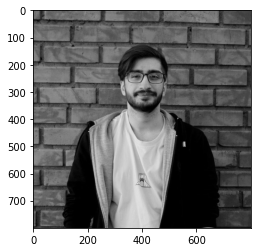

In [9]:
# load image and convert it to gray scale
img = plt.imread('images/afshin.jpg')
img_gray = np.dot(img[...,:3], [0.299, 0.587, 0.114]) # by searching. for converting to grayscale
plt.imshow(img_gray, cmap="gray")

In [10]:
# define gaussian kernel
kernel_size = 15
sigma = 1.0
kernel = np.zeros((kernel_size, kernel_size))
for i in range(kernel_size):
    for j in range(kernel_size):
        kernel[i,j] = np.exp(-((i - kernel_size // 2)**2 + (j - kernel_size // 2)**2) / (2 * sigma**2))
# Normalize the kernel
kernel = kernel / np.sum(kernel)

In [11]:
img_filtered = convolve(img_gray, kernel)
# this cell takes 4 seconds on my system

In [12]:
# generate Sobel outputs for 2 cases with gaussion filter and without gaussion filter and compare them
gx = convolve(img_gray, sobel_x)
gy = convolve(img_gray, sobel_y)
gx_fil = convolve(img_filtered, sobel_x)
gy_fil = convolve(img_filtered, sobel_y)
# this cell takes 15 seconds on my system

In [13]:
mag, dirs = compute_sobel_gradient(gx,gy)
mag_fil, dirs_fil = compute_sobel_gradient(gx_fil,gy_fil)
treshold1 = np.max(mag) // 6
treshold2 = np.max(mag_fil) // 6
mag[mag < treshold1] = 0
mag[mag >= treshold1] = 255
mag_fil[mag_fil < treshold2] = 0
mag_fil[mag_fil >= treshold2] = 255


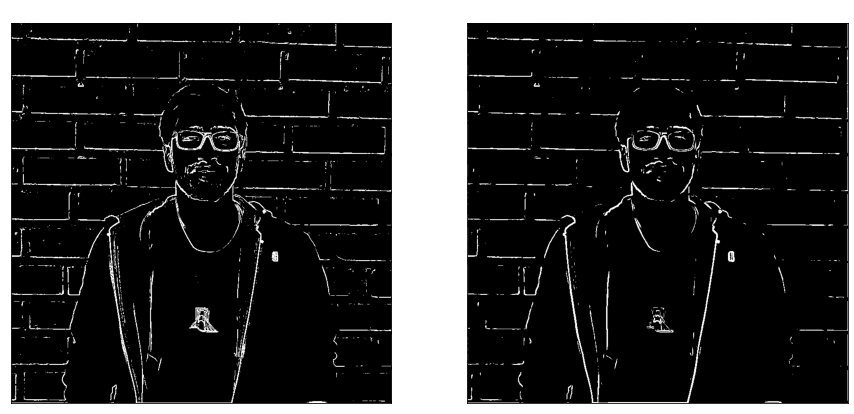

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(mag, cmap='gray'), plt.title('without gaussian', color='white')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(mag_fil, cmap='gray'), plt.title('with gaussian', color='white')
plt.xticks([]), plt.yticks([])
plt.show()

## c)

In [15]:
# do the operations in part b with OpenCV Sobel method and describe its parameters
import cv2
 
# Read the original image
img = cv2.imread('images/afshin.jpg') 
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (15,15), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=20, threshold2=40) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
 
cv2.destroyAllWindows()